# EDA

## 기본 설정
import, 데이터 파일 불러오기

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = '/opt/ml/input/data/train/'

train_info = pd.read_csv(f'{data_dir}/train_ratings.csv')
title_info = pd.read_csv(f'{data_dir}/titles.tsv', sep='\t')
year_info = pd.read_csv(f'{data_dir}/years.tsv', sep='\t')
writer_info = pd.read_csv(f'{data_dir}/writers.tsv', sep='\t')
genre_info = pd.read_csv(f'{data_dir}/genres.tsv', sep='\t')
director_info = pd.read_csv(f'{data_dir}/directors.tsv', sep='\t')
dataframe = {'title': title_info, 'year': year_info, 'writer': writer_info, 
             'genre': genre_info, 'director': director_info, 'train': train_info}

## 파일별 정보 분석
데이터 파일별 결측치, unique 데이터에 대해 알아보자

모든 파일에 결측치는 없었다. 다만, 파일별로 unique한 item 개수의 차이가 보였다.

In [30]:
for name, df in dataframe.items():
    print(f'{name} 정보 요약')
    print(f'총 데이터 개수: {len(df)}')
    for col_name in df.columns:
        nan_cnt = df[col_name].isna().sum()
        unique_val = df[col_name].unique()
        print(f'-{col_name} 행\n결측치 {nan_cnt}개\n데이터 3개(데이터 종류:{len(unique_val)}개): {unique_val[:3]}')
    print('-'*70)

title 정보 요약
총 데이터 개수: 6807
-item 행
결측치 0개
데이터 3개(데이터 종류:6807개): [ 318 2571 2959]
-title 행
결측치 0개
데이터 3개(데이터 종류:6806개): ['Shawshank Redemption, The (1994)' 'Matrix, The (1999)'
 'Fight Club (1999)']
----------------------------------------------------------------------
year 정보 요약
총 데이터 개수: 6799
-item 행
결측치 0개
데이터 3개(데이터 종류:6799개): [ 1348 44587  4768]
-year 행
결측치 0개
데이터 3개(데이터 종류:93개): [1922 1923 1924]
----------------------------------------------------------------------
writer 정보 요약
총 데이터 개수: 11306
-item 행
결측치 0개
데이터 3개(데이터 종류:5648개): [1237 5147 7327]
-writer 행
결측치 0개
데이터 3개(데이터 종류:2989개): ['nm0000005' 'nm0000019' 'nm0000033']
----------------------------------------------------------------------
genre 정보 요약
총 데이터 개수: 15933
-item 행
결측치 0개
데이터 3개(데이터 종류:6807개): [ 318 2571 2959]
-genre 행
결측치 0개
데이터 3개(데이터 종류:18개): ['Crime' 'Drama' 'Action']
----------------------------------------------------------------------
director 정보 요약
총 데이터 개수: 5905
-item 행
결측치 0개
데이터 3개(데이터 종류:5503개): [1237 5147 

### Item 관련 파일
영화 정보인 titile, year, write, genre, director 파일에 대해서 각각 분석해보자.

#### 제목(title) 파일
unique value가 item은 6807개이지만, title은 6806개이다. 이를 통해 중복된 케이스가 있다는 것을 알수 있었다.

분석 결과, War of the Worlds (2005) 데이터가 2개가 존재하는 것을 확인할 수 있다.

In [73]:
dataframe['title'].sample(7)

,item,title,year_title
336,54259,Stardust (2007),2007
3293,40491,"Match Factory Girl, The (Tulitikkutehtaan tytt...",1990
276,1729,Jackie Brown (1997),1997
6666,32296,Miss Congeniality 2: Armed and Fabulous (2005),2005
555,61132,Tropic Thunder (2008),2008
5503,71466,City Island (2009),2009
2026,6612,Brother's Keeper (1992),1992


영화 제목 뒷부분에 있는 연도 정보만 분리해 year_title column에 저장해보았다.

In [251]:
dataframe['title'][dataframe['title']['title']=='War of the Worlds (2005)']

,item,title,year_title
349,34048,War of the Worlds (2005),2005
1926,64997,War of the Worlds (2005),2005


#### 연도(year) 파일
파일에서 item 개수가 6799개만 존재해 title파일과 연결해본 결과, 8개 영화에 대해서 연도 정보가 없는 것을 확인할 수 있었다.

없는 부분의 데이터는 title에 있는 연도 정보를 가져왔다.

title 파일에서 추출한 연도는 year_title column에 저장했다.

In [264]:
dataframe['title']['year_title'] = dataframe['title']['title'].apply(lambda x: x.split('(')[-1][:4])
dataframe['title']['item'] = dataframe['title']['item'].astype(str)
dataframe['title'].describe(include='all')

,item,title,year_title
count,6807,6807,6807
unique,6807,6806,101
top,318,War of the Worlds (2005),2006
freq,1,2,284


title 파일과 year 파일의 연도 데이터를 비교해본 결과, unique한 year 데이터 개수 차이가 8개로 year 파일에 없는 item 개수와 같았고, 실제로도 그랬다.

In [272]:
dataframe['year']['item'] = dataframe['year']['item'].astype(str)
dataframe['year']['year'] = dataframe['year']['year'].astype(str)
dataframe['year'].describe(include='all')

,item,year
count,6799,6799
unique,6799,93
top,1348,2006
freq,1,284


In [273]:
title_year_unique = set(dataframe['title']['year_title'])
year_year_unique = set(dataframe['year']['year'])
not_exist_set = title_year_unique - year_year_unique
prit(f'title에만 존재하는 연도')
print(not_exist_set)

{'2015', '1902', '1916', '1917', '1919', '1920', '1915', '1921'}


title 파일과 합쳐 year_title과 year가 같은지 확인해보았다.

In [275]:
title_year = pd.merge(left=dataframe['title'], right=dataframe['year'], how='outer', on='item')

In [278]:
not_equal_idx = title_year['year_title'] != title_year['year']
print(f'불일치 개수: {not_equal_idx.sum()}')
title_year[not_equal_idx]

불일치 개수: 8


,item,title,year_title,year
984,6987,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",1920,NaN
1284,3310,"Kid, The (1921)",1921,NaN
2359,7065,"Birth of a Nation, The (1915)",1915,NaN
2620,7243,Intolerance: Love's Struggle Throughout the Ag...,1916,NaN
2669,8511,"Immigrant, The (1917)",1917,NaN
2676,6988,Broken Blossoms or The Yellow Man and the Girl...,1919,NaN
3177,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",1902,NaN
6043,119145,Kingsman: The Secret Service (2015),2015,NaN


1902년부터 2015년까지 영화 데이터가 존재한다.

연도별로 1개부터 284개까지 데이터가 존재한다.

2007년까지 개수가 증가하다 감소하는 추세가 보인다.

In [280]:
title_year['year_title'] = title_year['year_title'].astype('category')
all_cnt = len(title_year) 
avg_data_cnt = all_cnt // title_year['year_title'].nunique()

In [283]:
print(f'전체 데이터 개수: {all_cnt}')
print(f'평균 개수: {avg_data_cnt}')
year_stat = title_year['year_title'].value_counts()
year_stat

전체 데이터 개수: 6807
평균 개수: 67


2006    284
2007    271
2004    262
2005    260
2008    256
       ... 
1920      1
1919      1
1917      1
1916      1
2015      1
Name: year_title, Length: 101, dtype: int64

In [288]:
upper_cnt = (year_stat>=avg_data_cnt).sum()
lower_cnt = (year_stat<avg_data_cnt).sum()
print(f'평균 이상 연도: {upper_cnt}, 평균 미만 연도: {lower_cnt}')

평균 이상 연도: 31, 평균 미만 연도: 70


<AxesSubplot:xlabel='count', ylabel='year_title'>

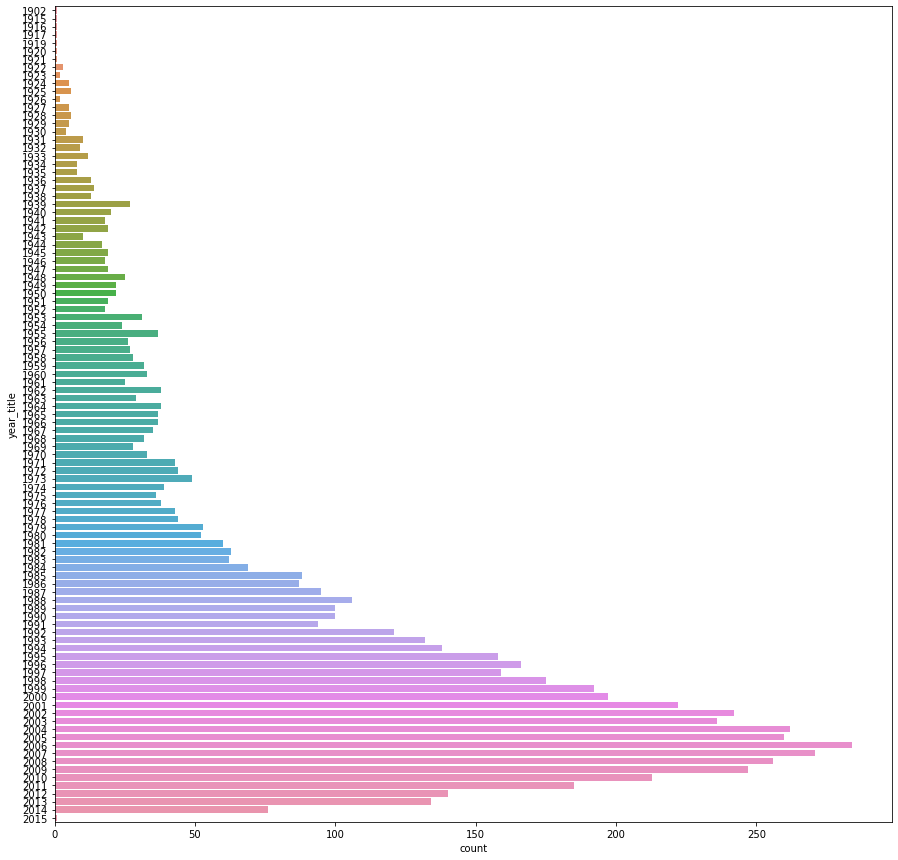

In [112]:
plt.figure(figsize = (15,15))
sns.countplot(y='year_title', data=title_year)

#### 작가(writer) 파일
1159개 item에 작가 정보가 없는 것을 확인할 수 있었다. 이는 item의 17프로이다.

작가 정보가 있는 item은 최소 2명 이상의 작가 정보를 가지고 있다.


In [289]:
dataframe['writer']['item'] = dataframe['writer']['item'].astype(str)
dataframe['writer'].describe(include='all')

,item,writer
count,11306,11306
unique,5648,2989
top,1907,nm0000095
freq,24,47


In [290]:
title_writer = pd.merge(left=dataframe['title'], right=dataframe['writer'], how='outer', on='item')
title_writer[title_writer['writer'].isna()]

,item,title,year_title,writer
340,590,Dances with Wolves (1990),1990,NaN
377,1225,Amadeus (1984),1984,NaN
435,8784,Garden State (2004),2004,NaN
511,47610,"Illusionist, The (2006)",2006,NaN
594,5010,Black Hawk Down (2001),2001,NaN
...,...,...,...,...
12449,1430,Underworld (1996),1996,NaN
12450,100302,Upside Down (2012),2012,NaN
12456,65193,Wild Child (2008),2008,NaN
12457,4219,Girls Just Want to Have Fun (1985),1985,NaN


In [292]:
no_writer_cnt = title_writer['writer'].isna().sum()
print(f'writer가 없는 영화 비율: {no_writer_cnt/6807:.2f}')

writer가 없는 영화 비율: 0.17


In [123]:
item_write_cnt = dataframe['writer']['item'].value_counts()
print(f'작가가 2명 이상인 item 개수: {(item_write_cnt > 1).sum()}')
print(f'작가 제일 많은 작품의 작가수: {item_write_cnt.max()}')
# sns.countplot(y='item', data=dataframe['writer'])

writer가 2명 이상인 item 개수: 2988
최대 writer 수: 24


In [299]:
all_cnt = len(dataframe['writer'])
avg_data_cnt = all_cnt // dataframe['writer']['writer'].nunique()
writer_stat = dataframe['writer']['writer'].value_counts()
upper_cnt = (writer_stat>=avg_data_cnt).sum()
lower_cnt = (writer_stat<avg_data_cnt).sum()

print(f'작가 평균 작품수: {avg_data_cnt}')
print(f'작품 개수가 평균 이상인 작가: {upper_cnt}, 작품 개수가 평균 미만인 작가: {lower_cnt}')

작가 평균 작품수: 3
작품 개수가 평균 이상인 작가: 1627, 작품 개수가 평균 미만인 작가: 1362


#### 장르(genre) 파일
총 18가지 장르로 구분되어 있다. 장르별 데이터 개수가 불균형을 이루고 있다.

모든 item에 대해서 1개 이상의 장르 정보가 지정되어 있다.

장르별 상관관계를 heatmap으로 표현해본 결과, children과 animation 사이의 연관성이 제일 강한 것으로 나왔다.

In [298]:
dataframe['genre']['item'] = dataframe['genre']['item'].astype(str)
dataframe['genre'].describe(include='all')

,item,genre
count,15933,15933
unique,6807,18
top,81132,Drama
freq,10,3490


In [300]:
all_cnt = len(dataframe['genre'])
avg_data_cnt = all_cnt // dataframe['genre']['genre'].nunique()
genre_stat = dataframe['genre']['genre'].value_counts()
upper_cnt = (genre_stat>=avg_data_cnt).sum()
lower_cnt = (genre_stat<avg_data_cnt).sum()

print(f'장르 평균 작품수: {avg_data_cnt}')
print(f'작품 개수가 평균 이상인 장르수: {upper_cnt}, 작품 개수가 평균 미만인 장르수: {lower_cnt}')

장르 평균 작품수: 885
작품 개수가 평균 이상인 장르수: 7, 작품 개수가 평균 미만인 장르수: 11


<AxesSubplot:xlabel='count', ylabel='genre'>

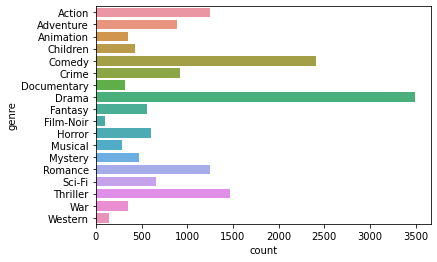

In [315]:
sns.countplot(y='genre', data=dataframe['genre'], order=sorted(dataframe['genre']['genre'].unique()))

<AxesSubplot:>

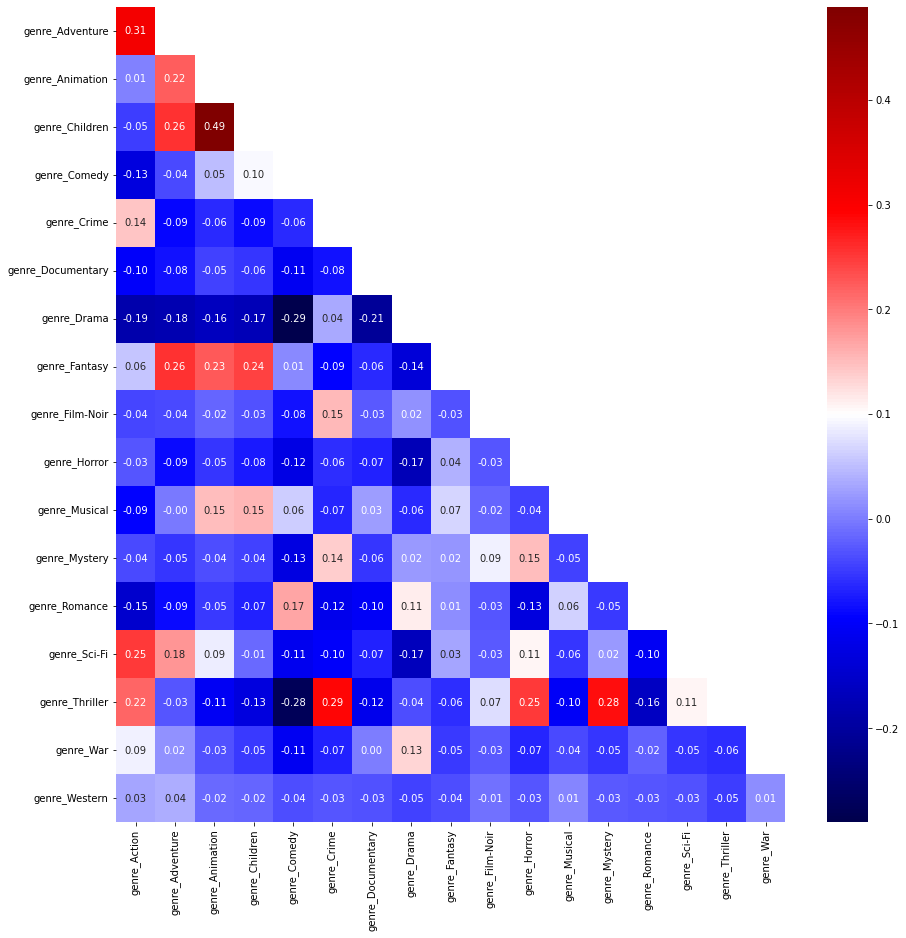

In [192]:
onehot_genre = pd.get_dummies(dataframe['genre'], columns=['genre']).set_index('item').sum(level=0).reset_index()

plt.figure(figsize=(15,15))
correlation_genre = onehot_genre.corr()
correlation_genre = correlation_genre.iloc[1:, :-1]
mask = np.ones_like(correlation_genre)
mask[np.tril_indices_from(mask)] = False
# for i in range(len(mask)): mask[i, i] = True
sns.heatmap(data=correlation_genre, annot=True, mask=mask, fmt = '.2f', cmap="seismic")

#### 감독(director) 파일
감독 정보가 없는 item의 수가 1304개이다. 이는 전체 item 수의 19%이다.

In [301]:
dataframe['director']['item'] = dataframe['director']['item'].astype('category')
dataframe['director'].describe(include='all')

,item,director
count,5905,5905
unique,5503,1340
top,50912,nm0000095
freq,14,44


In [302]:
item_cnt = len(dataframe['title'])
no_writer_cnt = item_cnt - dataframe['director']['item'].nunique()
print(f'writer가 없는 영화 비율: {no_writer_cnt/item_cnt:.2f}')

writer가 없는 영화 비율: 0.19


In [202]:
title_director = pd.merge(left=dataframe['title'], right=dataframe['director'], how='outer', on='item')
title_director[title_director['director'].isna()]

,item,title,year_title,director
155,1073,Willy Wonka & the Chocolate Factory (1971),1971,NaN
194,8784,Garden State (2004),2004,NaN
327,4246,Bridget Jones's Diary (2001),2001,NaN
376,1500,Grosse Pointe Blank (1997),1997,NaN
434,2710,"Blair Witch Project, The (1999)",1999,NaN
...,...,...,...,...
7180,32302,"League of Ordinary Gentlemen, A (2004)",2004,NaN
7195,88515,Blitz (2011),2011,NaN
7199,100302,Upside Down (2012),2012,NaN
7202,65193,Wild Child (2008),2008,NaN


In [303]:
all_cnt = len(dataframe['director'])
avg_data_cnt = all_cnt // dataframe['director']['director'].nunique()
director_stat = dataframe['director']['director'].value_counts()
upper_cnt = (director_stat>=avg_data_cnt).sum()
lower_cnt = (director_stat<avg_data_cnt).sum()

print(f'감독 평균 작품수: {avg_data_cnt}')
print(f'작품 개수가 평균 이상인 감독수: {upper_cnt}, 작품 개수가 평균 미만인 감독수: {lower_cnt}')

감독 평균 작품수: 4
작품 개수가 평균 이상인 감독수: 595, 작품 개수가 평균 미만인 감독수: 745


### User 관련 파일

#### train 파일

In [304]:
dataframe['train']['item'] = dataframe['train']['item'].astype(str)
dataframe['train']['user'] = dataframe['train']['user'].astype(str)
dataframe['train']['time'] = pd.to_datetime(dataframe['train']['time'], unit='s')
dataframe['train'].describe(include='all')

/tmp/ipykernel_377/1496759045.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataframe['train'].describe(include='all')


,user,item,time
count,5154471,5154471,5154471
unique,31360,6807,5074973
top,8405,2571,2010-02-25 22:00:19
freq,2912,19699,63
first,NaN,NaN,2005-04-11 11:56:25
last,NaN,NaN,2015-03-31 05:50:52


In [305]:
print('전체 평가수')
print(len(dataframe['train']))
print('동시간에 평가가 2개 이상인 경우')
print((dataframe['train']['time'].value_counts()>1).sum())

전체 평가수
5154471
동시간에 평가가 2개 이상인 경우
69137


In [306]:
all_cnt = len(dataframe['train'])
avg_data_cnt = all_cnt // dataframe['train']['user'].nunique()
train_stat = dataframe['train']['user'].value_counts()
upper_cnt = (train_stat>=avg_data_cnt).sum()
lower_cnt = (train_stat<avg_data_cnt).sum()

print(f'유저별 평가한 작품수 평균: {avg_data_cnt}')
print(f'시청 작품수가 평균 이상인 유저수: {upper_cnt}, 시청 작품수가 평균 미만이 유저수: {lower_cnt}')

유저별 평가한 작품수 평균: 164
시청 작품수가 평균 이상인 유저수: 10315, 시청 작품수가 평균 미만이 유저수: 21045


## 통합 분석

### 장르와 user 정보 연관분석

In [234]:
train_genre = pd.merge(left=dataframe['train'], right=dataframe['genre'], how='outer', on='item')

Drama          2511407
Comedy         1719017
Action         1504902
Thriller       1435678
Adventure      1203283
Crime          1014480
Romance         893843
Sci-Fi          857851
Fantasy         617807
Mystery         493005
Children        397929
Animation       370761
Horror          343730
War             307170
Musical         199635
Western          95374
Documentary      90050
Film-Noir        70402
Name: genre, dtype: int64

In [318]:
all_cnt = len(train_genre)
avg_data_cnt = all_cnt // train_genre['genre'].nunique()
train_genre_stat = train_genre['genre'].value_counts()
upper_cnt = (train_genre_stat>=avg_data_cnt).sum()
lower_cnt = (train_genre_stat<avg_data_cnt).sum()

print(f'장르별 평균 평가수: {avg_data_cnt}')
print(f'장르별 평균 평가수 이상인 작품수: {upper_cnt}, 장르별 평균 평가수 미만인 작품수: {lower_cnt}')

장르별 평균 평가수: 784795
장르별 평균 평가수 이상인 작품수: 8, 장르별 평균 평가수 미만인 작품수: 10


<AxesSubplot:xlabel='count', ylabel='genre'>

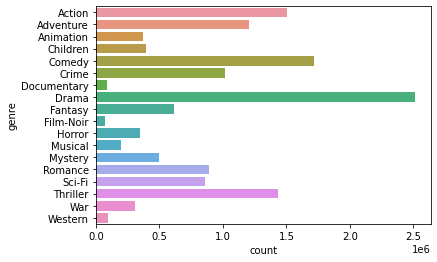

In [317]:
sns.countplot(y='genre', data=train_genre, order=sorted(train_genre['genre'].unique()))

### 시간과 user 정보 연관분석

In [236]:
train_genre['time'].unique()

array(['2009-01-01T04:02:09.000000000', '2011-04-16T09:10:16.000000000',
       '2010-10-30T11:21:02.000000000', ...,
       '2014-01-30T15:47:46.000000000', '2013-06-02T03:27:55.000000000',
       '2013-06-16T11:26:12.000000000'], dtype='datetime64[ns]')

2005-04-11 11:56:25    1
2005-04-11 12:02:16    4
2005-04-11 12:02:55    5
2005-04-11 12:13:45    2
2005-04-11 12:20:04    3
                      ..
2015-03-31 05:44:23    5
2015-03-31 05:44:40    3
2015-03-31 05:50:01    3
2015-03-31 05:50:48    3
2015-03-31 05:50:52    3
Name: time, Length: 5074973, dtype: int64


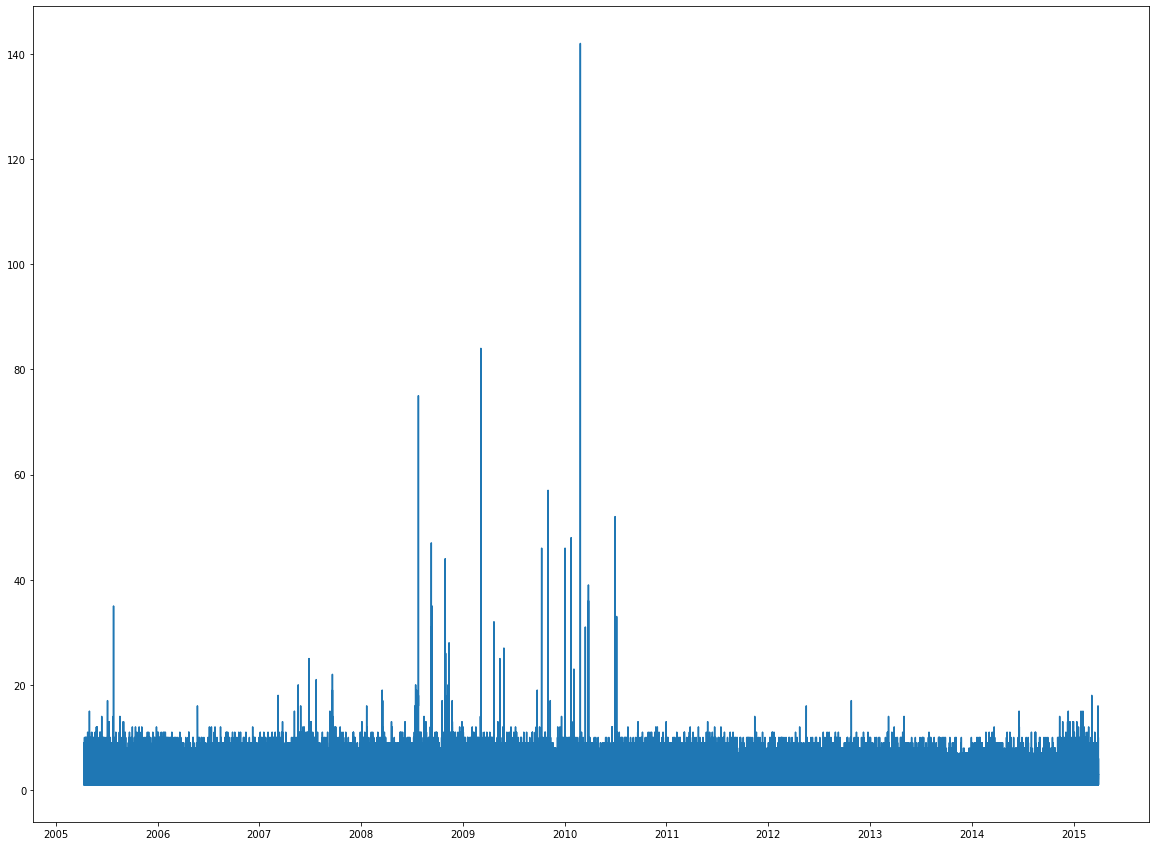

In [329]:
plt.figure(figsize = (20,15))
time_count = train_genre['time'].value_counts().sort_index()
print(time_count)
plt.plot(time_count.index, time_count.values)

2005년부터 2015년 사이의 데이터로 이루어져 있음을 확인할 수 있다.

In [240]:
train_genre['year'] = train_genre['time'].dt.year
train_genre['year'].unique()

<AxesSubplot:xlabel='year', ylabel='count'>

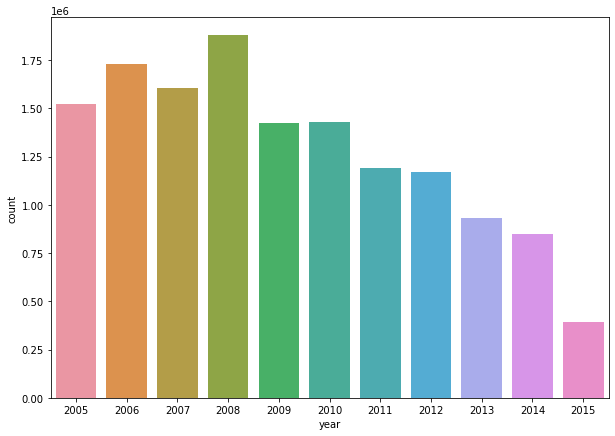

In [320]:
plt.figure(figsize = (10,7))
sns.countplot(x='year', data=train_genre)

In [321]:
onehot_genre = pd.get_dummies(train_genre, columns=['genre']).set_index('user').sum(level=0).reset_index()

/tmp/ipykernel_377/804283228.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  onehot_genre = pd.get_dummies(train_genre, columns=['genre']).set_index('user').sum(level=0).reset_index()
/tmp/ipykernel_377/804283228.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  onehot_genre = pd.get_dummies(train_genre, columns=['genre']).set_index('user').sum(level=0).reset_index()


장르별 분포와 시간별 분포에서 근 차이가 보이지는 않았다.

<AxesSubplot:xlabel='year', ylabel='count'>

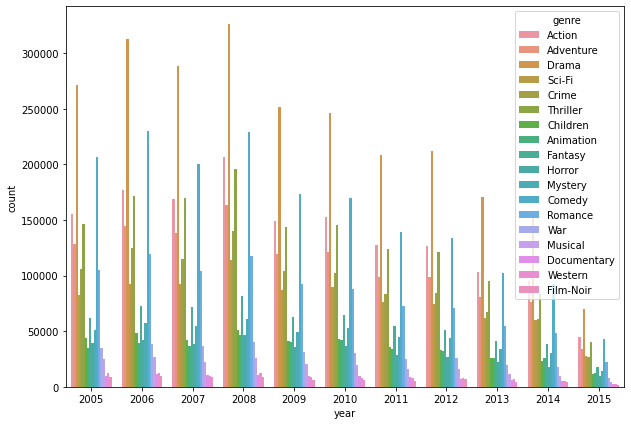

In [322]:
plt.figure(figsize = (10,7))
sns.countplot(x='year', hue='genre', data=train_genre)

<AxesSubplot:xlabel='month', ylabel='count'>

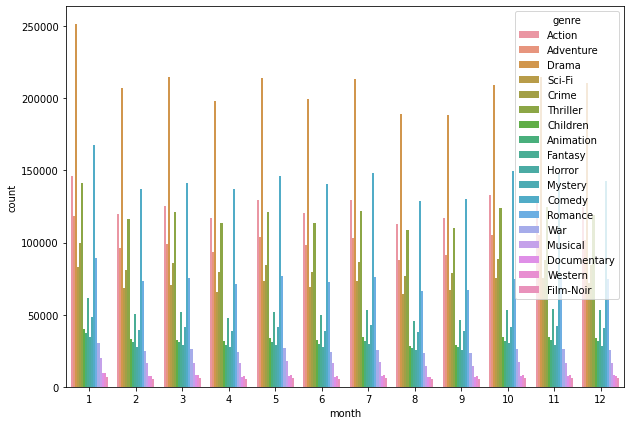

In [250]:
train_genre['month'] = train_genre['time'].dt.month
plt.figure(figsize = (10,7))
sns.countplot(x='month', hue='genre', data=train_genre)